In [89]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

%matplotlib inline


In [90]:
df = pd.read_csv("data.csv",header = 0)
df = df.drop("Unnamed: 32",1)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
#cancer = load_breast_cancer()
#print(cancer.DESCR)

In [92]:
#print(cancer.target_names)

In [93]:
#print(cancer.feature_names)

In [94]:
#cancer.data

In [95]:
#type(cancer.data)

In [96]:
#cancer.data.shape

In [97]:
X = df.iloc[:,2:] 
y = df.diagnosis
le = LabelEncoder()
y = le.fit_transform(y)

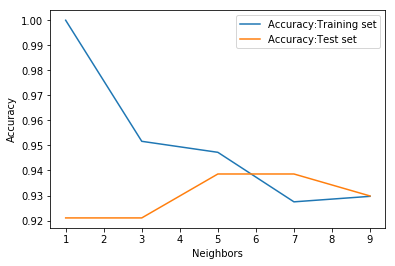

In [98]:
#KNN Classifier 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#k nearest neighbor from 10
neighbors_setting = range(1,10, 2)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy:Training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy:Test set')
plt.ylabel('Accuracy')
plt.xlabel('Neighbors')
plt.legend()

#best result accurs when K=6

In [99]:
print("Accuracy:Training set 6NN: {:3f}".format(training_accuracy[4]))
print("Accuracy:Test set 6NN: {:3f}".format(test_accuracy[4]))

Accuracy:Training set 6NN: 0.929670
Accuracy:Test set 6NN: 0.929825


In [104]:
#Neural Network
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('Accuracy:Training set: {:.3f}'.format(mlp.score(X_train, y_train)))
print('Accuracy:Test set: {:.3f}'.format(mlp.score(X_test, y_test)))

Accuracy:Training set: 0.637
Accuracy:Test set: 0.588


In [105]:
#The Bette algorithm is KNN in here for Accuricy